In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
%matplotlib inline

In [31]:
train_data = pd.read_csv('day.csv')
test_data = pd.read_csv('test.csv')
instant = pd.DataFrame(test_data['instant'])

train_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [32]:
train_data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

# Data Preprocessing

In [33]:
y = train_data['cnt']
X = train_data.drop(['instant', 'cnt'], axis='columns')

X.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518


In [34]:
X.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
dtype: int64

season        0.256280
yr            0.417900
mnth          0.175519
holiday      -0.107448
weekday       0.042210
workingday    0.326616
weathersit   -0.266699
temp          0.525363
atemp         0.537689
hum          -0.095201
windspeed    -0.155970
casual        0.386416
registered    1.000000
Name: registered, dtype: float64




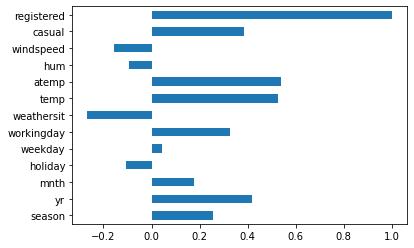

In [38]:
X.corr().iloc[:, -1].plot(kind='barh')
print(X.corr().iloc[:, -1])
print('\n')

<AxesSubplot:>

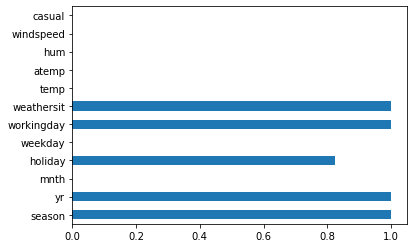

In [42]:
pd.Series(chi2(X.iloc[:, 1:-1], X.iloc[:, -1])[1], X.columns[1:-1]).plot(kind='barh')

In [44]:
X = train_data.drop(['instant', 'cnt', 'dteday', 'workingday', 'holiday'], axis='columns')

# Model Fitting

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [47]:
print("Mean squared error: ", mean_squared_error(y_test, y_pred))
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_pred)))

Mean squared error:  2.701065859124979e-25
Root mean squared error:  5.197177944928361e-13


# Prediction

In [49]:
pred = model.predict(test_data.drop(['dteday', 'instant','holiday', 'workingday'], axis='columns'))
predictions = pd.DataFrame(pred, columns=['cnt'])

solution = pd.concat([instant, predictions], axis=1)

solution.to_csv('solution.csv', index=False)